<a href="https://colab.research.google.com/github/haythemtellili/Great-notebook/blob/master/Satelite_image_segementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* We are going to be using the K-Means Unsupervised Clustering Algorithm to segment images from satellite.

* We are going to cluster pixels based on their spatial and color data only.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
import numpy as np
from sklearn.cluster import KMeans
from PIL import Image
from skimage.color import rgb2hsv
import os

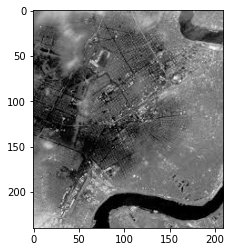

In [2]:
img = Image.open('/content/satelite1.jpeg')
x = np.array(img)
imshow(x)

* We are concatenating the RGB and HSV color spaces. 240x210x3 + 240x210x3 = 240x210x6

In [3]:
z = np.dstack((x,rgb2hsv(x)))
z.shape

(240, 210, 6)


* The K-Means clustering algorithm only takes 2 dimensional input so We are squishing the X & Y dimension into 1 spatial dimesion
* The new dimensions are now 240*240 x 6 == 50400x6


In [4]:
vectorized = np.float32(z.reshape((-1,6)))
vectorized.shape

(50400, 6)

* We are picking K = 8 clusters for this image
* The algorithm starts with K cluster centroids that are randomly initialized
* All pixels are then assigned to their nearest cluster centroid
* The cluster centroids are then recalculated and this process repeats until convergence



In [9]:
kmeans = KMeans(random_state=0, init='random', n_clusters=4)
labels = kmeans.fit_predict(vectorized)



* Reshaping labels array back into X & Y dimensions to be able to view the images


In [10]:
labels.shape

(50400,)

In [11]:
pic = labels.reshape(240,210)

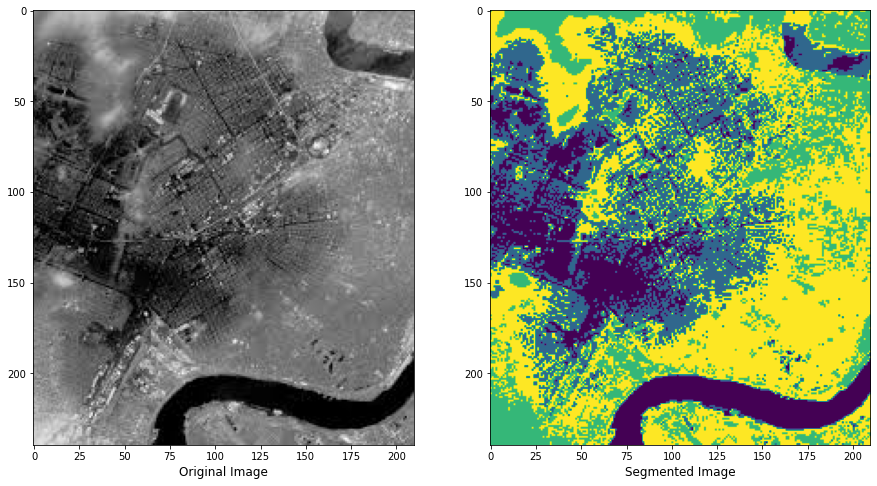

In [12]:
f, axarr = plt.subplots(1,2,figsize=(15,15))
axarr[0].set_xlabel('Original Image', fontsize=12)
axarr[1].set_xlabel('Segmented Image', fontsize=12)  
axarr[0].imshow(x)
axarr[1].imshow(pic)
plt.savefig('foo.png')